# Business Understanding 

The goal of this project is to use data to deliver analysis to my client(Microsoft). Microsoft wants to know what types of films are currently doing the best at the box office.After I worked with data, I built a visual presentation to show 3  recommendations for creating a successful movie. I want to show what would be the best type of films to create. I want to investigate the average budget, duration,language and genres to make future predictions and recommendations for my client.
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am  charged with exploring what types of films are currently doing the best at the box office. 


# Data Understanding

Dataset contains thousands of data points. The data files provide information about movies their rating, domestic gross and foreign gross. I checked which are the Top 3 most profitable movies? Average runtime,budget,domestic gross and worldwide gross of movies? Movies which are rated above 8 by the critics? Which year did we have the most profitable movies? What are the top  genres?

# Data Preparation¶

CSV for reading CSV file

Pandas and Numpy for data manipulation 

Matplotlib and Seaborn for visualization 

SQLite for data ingestion and extraction

Seaborn for visualization

# Exploratory Data Analysis¶

To answer the questions I posed at the beginning of this project, I performed exploratory analyses on the basis of genre,language,duration of the movie, and budget.For each of these themes I made a visualization for better vision and better understanding. 

At the very beginning I am importing the packages I will be using for this project to read, manipulate, clean my data and to make future visualizations. 

In [1]:
#importing all necessary databases 
import pandas as pd
import ast, json
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
conn = sqlite3.connect('im.db.zip')
sns.set_context("poster")
sns.set_style("darkgrid")

pd.options.mode.chained_assignment = None 

In [2]:
#Reading CSV files
bom_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movies = pd.read_csv('data/tmdb.movies.csv.gz')
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

After I read the data I wanted to clean it and  drop all null values which means the data value in the column is unknown or missing. 

In [3]:
# Drop all null values in runtime column
info.dropna(subset = 'runtime', inplace = True)
# Reset index to be sequential 
info.reset_index(inplace=True)

I took the "info" dataframe in, and alters the value to remove " minutes" and convert to an int to be able to calculate average runtime for the future movie

In [4]:
def whitespace_remover(df):

    df = df.copy()
    for i in range(len(df['runtime'])):
        df['runtime'][i] = int(df['runtime'][i].replace(' minutes',''))
    return df

I wanted to remove white spaces to be able calculate average runtime for the future movie 

In [6]:
#Removing white spaces
info_df = whitespace_remover(info)

In [7]:
info_df

,index,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106,New Line Cinema
1526,1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88,Paramount Vantage
1527,1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111,NaN
1528,1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101,NaN


Then I was ready to calculate what would be the best runtime for the future movie. To do this I had to see what is the average runtime of all movies in a given dataset. 

In [8]:
#finding what is the average time for the movie
info_df['runtime'].mean()

103.96797385620916

I found out what is the average runtime in this dataset. I got an idea what should be the runtime for the move. Based on this information I can recommend to my client what would be good runtime for the future movie.

In [9]:
#solved UFuncTypeError by converting "runtime" column from int to float 
info_df['runtime'] = info_df['runtime'].astype(float)

`sns.lmplot` was giving an error referring to the 'runtime' comumns DataType. to slove this problam I searched the following: 

`"sns.lmplot" UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'` 

This lead me to this search results found [here](https://stackoverflow.com/questions/75546110/error-on-seaborn-lmplot-when-passing-dataframe-data-due-to-dtypeo-error-exc). 

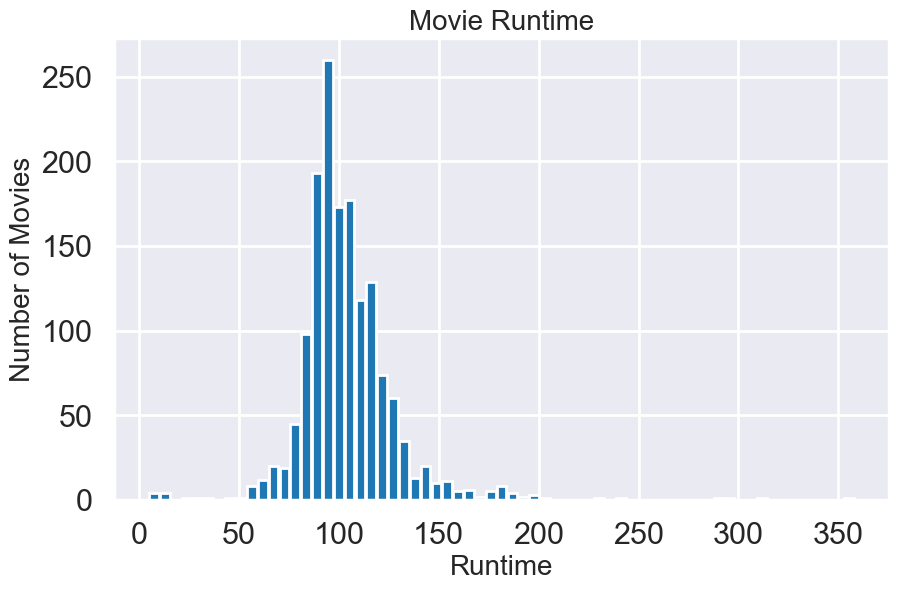

<Figure size 640x480 with 0 Axes>

In [10]:
# plotting runtime of movies 
plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Movie Runtime',fontsize=20)
plt.hist(info_df['runtime'], rwidth = 0.9, bins = 65)
plt.show()
plt.savefig('images/movie_runtime.jpg')

### The above plot helped me to see that most movies in this dataset have a runtime around 90 min.Recommendation for my client based on this information to make a successful movie the runtime should be around 90-103 min.

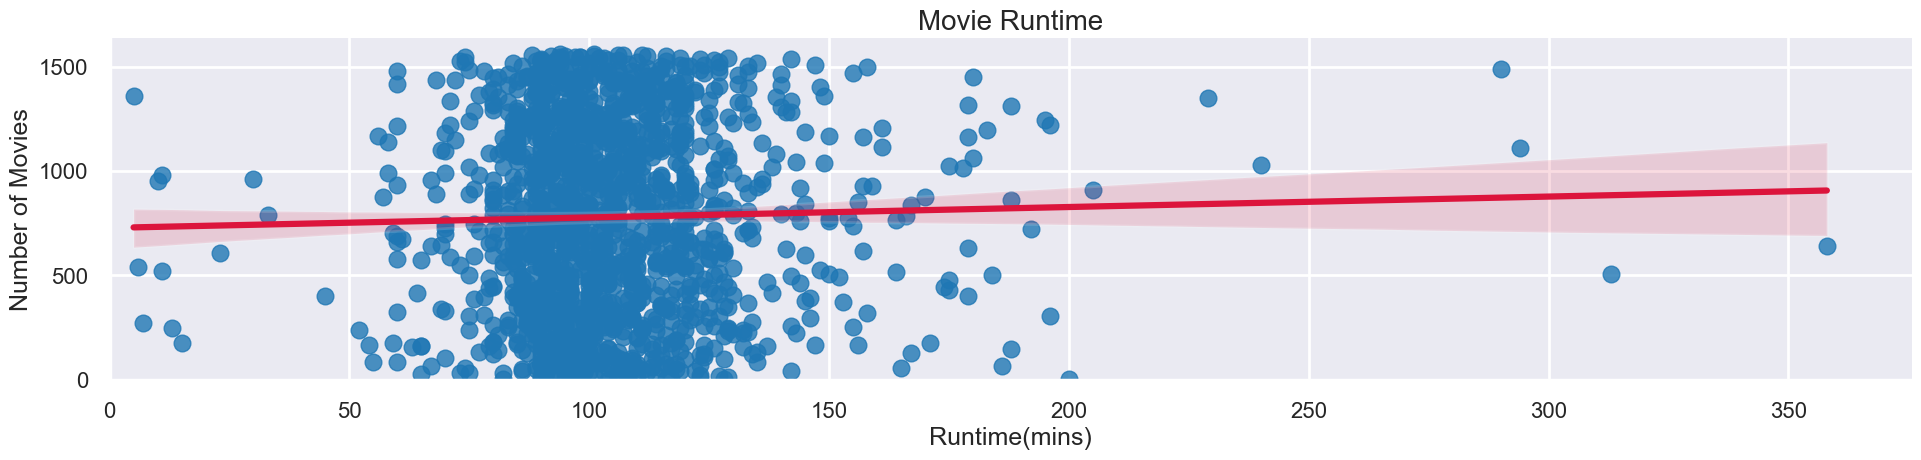

In [11]:
#Trying differen style to see which style looks better 
sns.lmplot( x='runtime',y='index' , data=info_df, aspect=4, line_kws={'color': 'crimson'})
plt.title('Movie Runtime', fontsize=20)
plt.xlabel('Runtime(mins)', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,None)
plt.xlim(0, None);


This plot is not good for showing runtime. I could't really clearly see what is the most useful runtime so, I would definitely use fist plot because there I can clearly see the information I want to present to my client. 

I wanted to start working with another dataset to find out what would be the best recommendation on genre, budget, language ets. I started with cleaning data. There were a few columns in this dataset that were not relevant to my analysis:'studio','year','Unnamed: 0','id','title_y','original_title','vote_count' I began droping them.

In [12]:
#murging data
bom_movies = pd.merge(bom_gross_df,movies, left_on='title', right_on='original_title', how='left',suffixes=('','_y'))

In [13]:
#Droping unnecessary columns
bom_movies.drop([ 'studio','year',
       'Unnamed: 0','id','title_y','original_title','vote_count'  ], axis=1, inplace=True)
bom_movies

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7
1,Alice in Wonderland (2010),334200000.0,691300000,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,NaN,NaN,NaN,NaN,NaN
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,15.041,2010-05-16,6.1
...,...,...,...,...,...,...,...,...
3718,The Quake,6200.0,NaN,NaN,NaN,NaN,NaN,NaN
3719,Edward II (2018 re-release),4800.0,NaN,NaN,NaN,NaN,NaN,NaN
3720,El Pacto,2500.0,NaN,NaN,NaN,NaN,NaN,NaN
3721,The Swan,2400.0,NaN,NaN,NaN,NaN,NaN,NaN


Then I dropped duplicates.

In [14]:
print(bom_movies.shape)
bom_movies = bom_movies.drop_duplicates(keep='first')
print(bom_movies.shape)

(3723, 8)
(3502, 8)


I then replaced all the zeros with NaN to be able to dropping it. Then dropped it to have a clean data.

In [16]:
# replacing all the zeros and replacing it with NaN.
cols = ['domestic_gross', 'foreign_gross','popularity', 'vote_average']
bom_movies[cols] = bom_movies[cols].replace(0, np.nan)

# dropping all the rows with NaN in the columns mentioned above in the list.
bom_movies.dropna(subset=cols, inplace=True)
bom_movies.shape

(1404, 8)

I wanted to see what was the most profitable year. For that I wanted to take only a year from every date and plot the graph to have a better vision.

In [17]:
# Changing the release_date column to DateTime column

bom_movies.release_date = pd.to_datetime(bom_movies['release_date'])
bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,15.041,2010-05-16,6.1
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8


In [18]:
#taking a year from every data 
bom_movies['release_year'] = bom_movies['release_date'].dt.year
bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,release_year
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,2010
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,2010
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,15.041,2010-05-16,6.1,2010
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,2010
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,2010


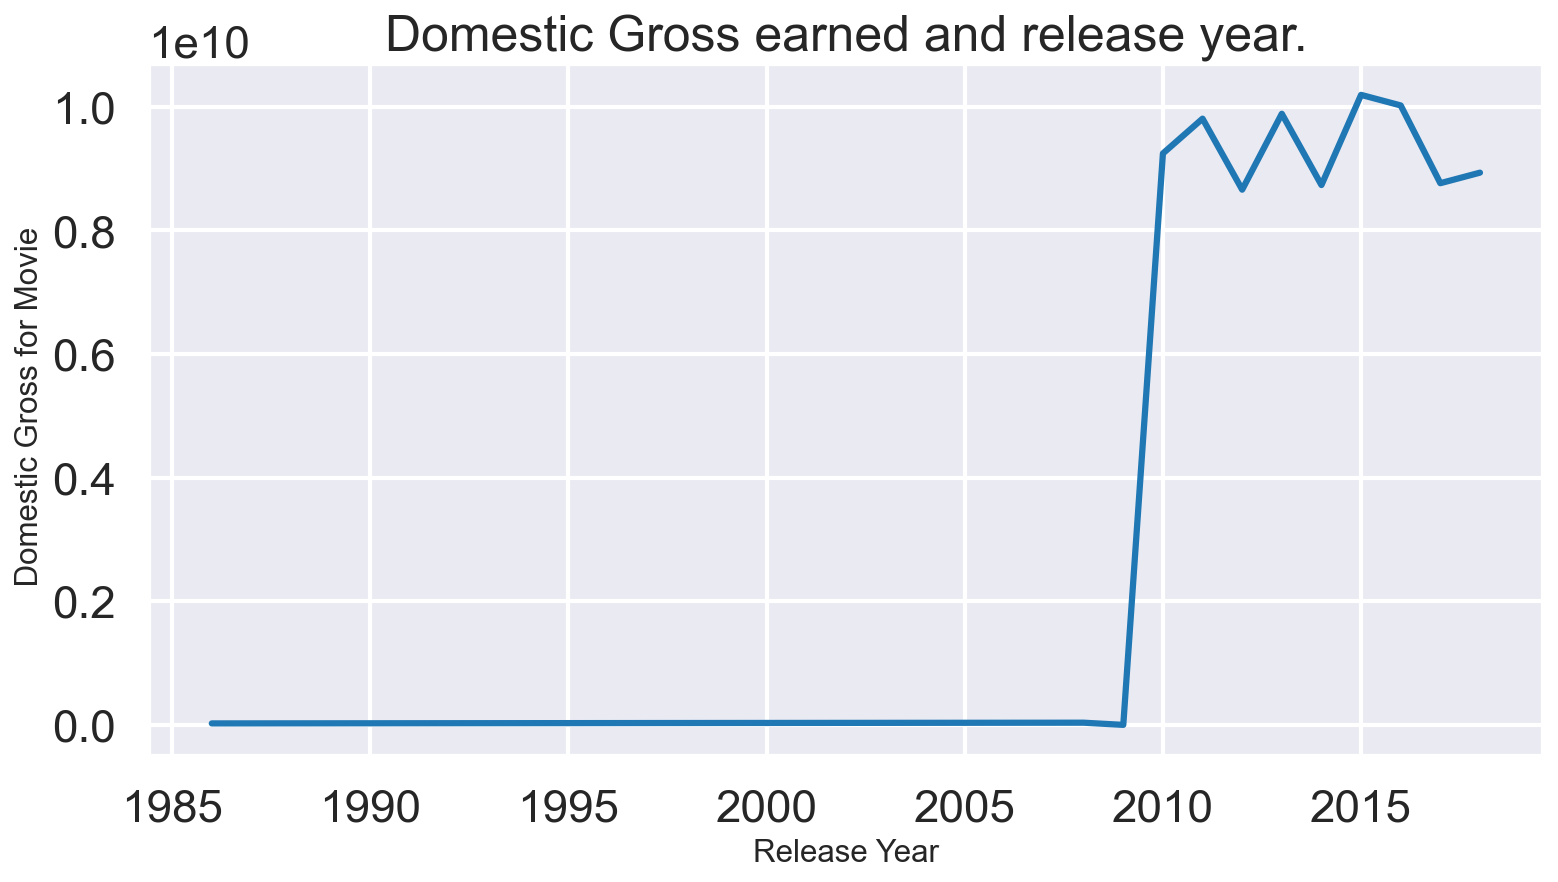

<Figure size 640x480 with 0 Axes>

In [19]:
## plotting the most profitable year 


domestic_gross_year = bom_movies.groupby('release_year')['domestic_gross'].sum()
plt.figure(figsize=(12,6), dpi = 150)

plt.xlabel('Release Year', fontsize = 15)
plt.ylabel(' Domestic Gross for Movie', fontsize = 15)
plt.title('Domestic Gross earned and release year.')
plt.plot(domestic_gross_year)
plt.show()
plt.savefig('images/protitible_year.jpg')

In the graph above I wanted to show what was the most successful year for movie released.I also wanted to show that with every year movies getting better and more profitable. In this dataset there is only data from 2010 until 2015 years.

In [20]:
domestic_gross_year.idxmax()

2015

I wanted to see TOP 3 most profitable movies and analyze them to get an information and recommendation for my client on what would be the best language and genre for the future movie and find out what would be the approximate budget to create a new movie and also to predict future profit.  

In [21]:
#movies have profit over $80M 
profit= bom_movies[bom_movies['domestic_gross'] >= 80000000]
profit.index = range(len(profit))
profit.index = profit.index + 1
profit.head(3)

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,release_year
1,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,2010
2,Inception,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,2010
3,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,15.041,2010-05-16,6.1,2010


So, those are the top 3 most profitable movies.   
Top profitable movies are ‘Toy story 3’ , ‘Inception’ and ‘ Shrek Forever after’. All of these are in English.  The genres of the most profitable movies in this data set are for Toy Story Animation, Family, Comedy. For Inception its Action,Fiction, Adventure. And for Shrek its Animation, Family, Comedy, Adventure and Fantasy. So, here I could come to the conclusion based on the dataset to make a profitable movie it would have to be something for kids, for family, some Animation Family movie or some Action, Fiction, Adventure..


Then I wanted to check what are the top 5 movies based on popularity 

In [22]:
#checkin top 5 popular movies
popular_movies_df = bom_movies.sort_values(by ='popularity', ascending=False).head()
popular_movies_df

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,release_year
3391,Avengers: Infinity War,678800000.0,"1,369.5","[12, 28, 14]",en,80.773,2018-04-27,8.3,2018
1619,John Wick,43000000.0,45700000,"[28, 53]",en,78.123,2014-10-24,7.2,2014
1539,The Hobbit: The Battle of the Five Armies,255100000.0,700900000,"[28, 12, 14]",en,53.783,2014-12-17,7.3,2014
1540,Guardians of the Galaxy,333200000.0,440200000,"[28, 878, 12]",en,49.606,2014-08-01,7.9,2014
3047,Blade Runner 2049,92100000.0,167200000,"[878, 28, 53]",en,48.571,2017-10-06,7.4,2017


Ok, so, here are the top 5 most popular movies in this dataset. Again, the language is English for all the movies.  The genres for all those movies  are very similar; Adventure,Action,Fantasy,Thriller, Fiction. So , those are what people are interested in based on the provided dataset.


In [23]:
#movies rated 8 and more
bom_movies[bom_movies['vote_average'] >= 8.0]

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,release_year
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,2010
23,Shutter Island,128000000.0,166800000,"[18, 53, 9648]",en,18.060,2010-02-18,8.1,2010
366,The Help,169700000.0,46900000,[18],en,12.598,2011-08-10,8.1,2011
533,Senna,1600000.0,6600000,[99],en,7.410,2011-01-21,8.3,2011
767,Django Unchained,162800000.0,262600000,"[18, 37]",en,21.260,2012-12-25,8.0,2012
925,Delicacy,499000.0,9200000,"[27, 18]",en,0.600,2013-04-20,8.0,2013
1117,Wagner & Me,37700.0,41000,"[10402, 99]",en,0.840,2012-11-02,8.0,2012
1233,Prisoners,61000000.0,61100000,"[18, 53, 80]",en,14.358,2013-09-21,8.0,2013
1336,Paranoia,7400000.0,6400000,"[53, 27]",en,0.600,2016-05-24,10.0,2016
1547,Interstellar,188000000.0,489400000,"[12, 18, 878]",en,28.440,2014-11-05,8.2,2014


I checked movies rated 8 and more out of 10. I could see that nothing changed in language column. So, all of those movies are in English language.I wanted to make a plot to have a better vision of what language would be the best for the future movie.

In [24]:
#Languages for movies in our database 
bom_movies['original_language'].value_counts()

en    1358
fr      11
hi       9
es       7
it       2
ko       2
da       2
de       2
nl       2
pt       1
te       1
th       1
xx       1
cs       1
bs       1
el       1
ro       1
zh       1
Name: original_language, dtype: int64

Information about which Language for each ids number I found [here](https://gist.github.com/gamache/b933a1587155f133bf6c).
I want to see what is the most popular language for the future movie

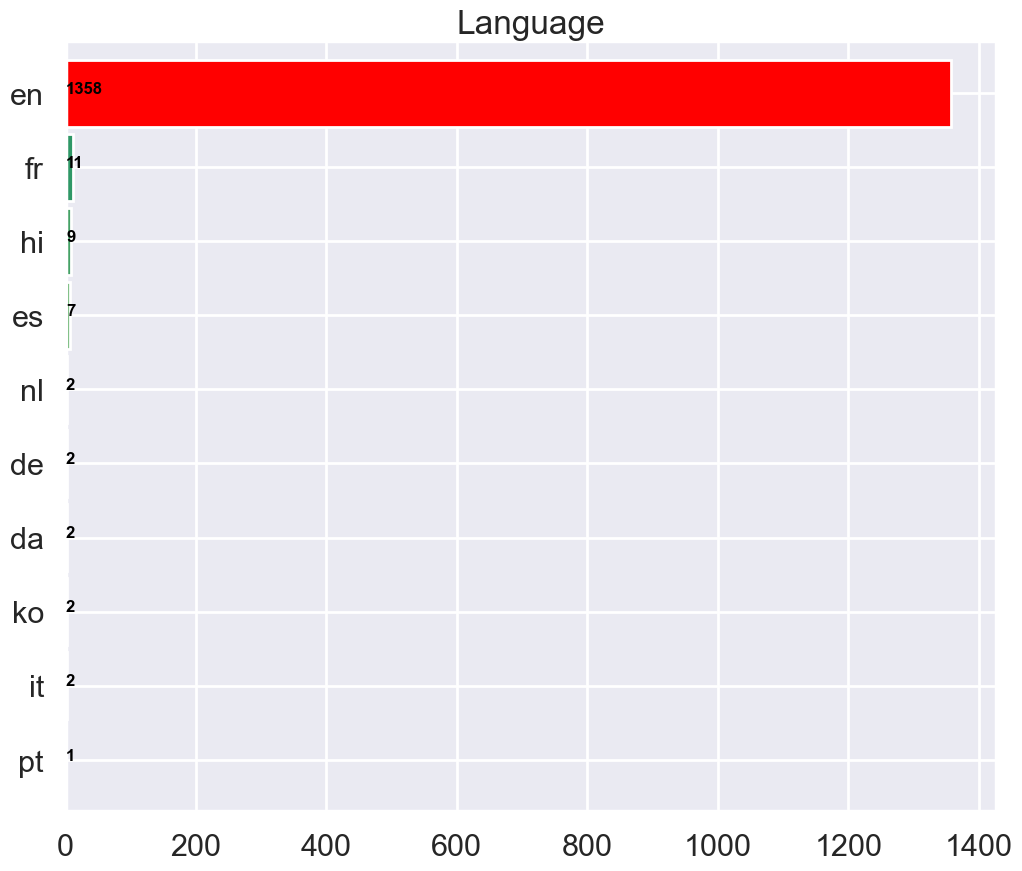

<Figure size 640x480 with 0 Axes>

In [25]:
# plotting the number of movies in each Language 
bom_movies['original_language']=bom_movies['original_language'].str.strip('[]').str.replace(' ','').str.replace("'",'')
bom_movies['original_language']=bom_movies['original_language'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in bom_movies['original_language']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Language')
plt.show()
plt.savefig('images/lenguage.jpg')

After I saw the blot I could be sure that to make a successful movie language has to be English.
I could also see there are not a lot of movies in this dataset in other languages.

## Top 10 most common languages in this dataset are: 
#### -English       -1358 movies
#### -French        -11 movies
#### -Hindi            -9 movies
#### -Spanish       -7 movies
#### -Dutch           -2 movies
#### -German        -2 movies
#### -Danish          -2 movies
#### -Korean         -2 movies
#### -Italian           -2 movies
#### -Portuguese -1 movies

I also wanted to predict the approximate budget that my client will need to make a movie. For that information I had to calculate the average budget for creating a movie.

In [26]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


First of all I had to clean the data by removing commas, spaces and dollar signs.

In [27]:
#removing commas and dollars signs
budgets['production_budget']=budgets['production_budget'].str.replace(',', '')
budgets['production_budget']=budgets['production_budget'].str.replace('$', '')
budgets['production_budget']=budgets['production_budget'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_75878/3377784623.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['production_budget']=budgets['production_budget'].str.replace('$', '')


After I cleaned the data I wanted to see the average number of the budget to make a recommendation on what would be a good budget to create a new movie.

In [28]:
#Average bugdget for movie
budgets['production_budget'].mean()

31587757.0965064

Looks like the average budget to create a movie would be 31 million USD. 

To predict the profit I first had to cleaned data by removing commas, spaces and dollar signs. Then calculate average number of worldwide gross and domestic gross then calculate what would be the profit.

In [29]:
#removing commas and dollars signs
budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace('$', '')
budgets['worldwide_gross']=budgets['worldwide_gross'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_75878/3358533335.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace('$', '')


In [30]:
#Average worldwide gross for movie
budgets['worldwide_gross'].mean()

91487460.90643376

The average worldwide gross is 91 million USD. 
So, the worldwide profit would be 60 million USD

In [31]:
#removing commas and dollars signs
budgets['domestic_gross']=budgets['domestic_gross'].str.replace(',', '')
budgets['domestic_gross']=budgets['domestic_gross'].str.replace('$', '')
budgets['domestic_gross']=budgets['domestic_gross'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_75878/2118193080.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['domestic_gross']=budgets['domestic_gross'].str.replace('$', '')


In [32]:
#Average domestic gross for movie
budgets['domestic_gross'].mean()

41873326.867001034

The average domestic gross is 41 million USD. 
So, the domestic profit would be 10 million USD.

### What types of movies are currently most successful?

To ansver this question first I had to clean the data by removing spaces and commas then I had to replace genre ids with genre name. Then I wanted to make a plot for better vision.

In [33]:
#spliting genres
info_df['genre'][0].split('|')

['Action and Adventure', 'Classics', 'Drama']

In [34]:
#Removing spaces and commas 
bom_movies['genre_ids']=bom_movies['genre_ids'].str.strip('[]').str.replace(" ",'')
bom_movies['genre_ids']=bom_movies['genre_ids'].str.split(',')

bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,release_year
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",[en],24.445,2010-06-17,7.7,2010
3,Inception,292600000.0,535700000,"[28, 878, 12]",[en],27.920,2010-07-16,8.3,2010
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",[en],15.041,2010-05-16,6.1,2010
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",[en],20.340,2010-06-23,6.0,2010
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",[en],28.515,2010-05-07,6.8,2010


Replacing genre ids with genre name. 
Information about which name for each ids number I found [here](https://developers.themoviedb.org/3/genres/get-movie-list). 

In [35]:
#Replacing #ids with genre name 
genre = {
    'Action': '28',
    'Adventure': '12',
    'Animation': '16',
    'Comedy': '35',
    'Crime': '80',
    'Documentary': '99',
    'Drama': '18',
    'Family': '10751',
    'Fantasy': '14',
    'History': '36',
    'Horror': '27',
    'Music': '10402',
    'Mystery': '9648',
    'Romance': '10749',
    'ScienceFiction': '878',
    'TVMovie': '10770',
    'Thriller': '53',
    'War': '10752',
    'Western': '37'
}

In [36]:
#bom_movie_2= bom_movies[['title','genre_ids']]

In [37]:
my_genres_df = pd.DataFrame.from_dict(genre, orient='index', columns=['id'])
my_genres_df.index.name = 'genre'


I used for loops to replace genre ids with genre names to be able to make a plot.

In [38]:
#using for loops for replacement Ids with genre name
my_genres_df['count'] = 0
for index, row in bom_movies.iterrows():
    genre_ids = row['genre_ids']
    for genre_id in genre_ids:
        try:
            genre_name = list(genre.keys())[list(genre.values()).index(str(genre_id))]
            my_genres_df.loc[genre_name, 'count'] = my_genres_df.loc[genre_name, 'count'] + 1
        except ValueError:
            continue

print(my_genres_df)

                   id  count
genre                       
Action             28    346
Adventure          12    257
Animation          16    102
Comedy             35    481
Crime              80    173
Documentary        99     62
Drama              18    649
Family          10751    157
Fantasy            14    144
History            36     62
Horror             27    140
Music           10402     46
Mystery          9648    107
Romance         10749    196
ScienceFiction    878    162
TVMovie         10770      2
Thriller           53    353
War             10752     31
Western            37     17


In [39]:
my_genres_df = my_genres_df.sort_values(by='count', ascending=False)

I made a plot to show the number of movies in each genre to see what kind of movie released the most to make a recommendation for my client of what should be the genre of the movie to make it successful. 

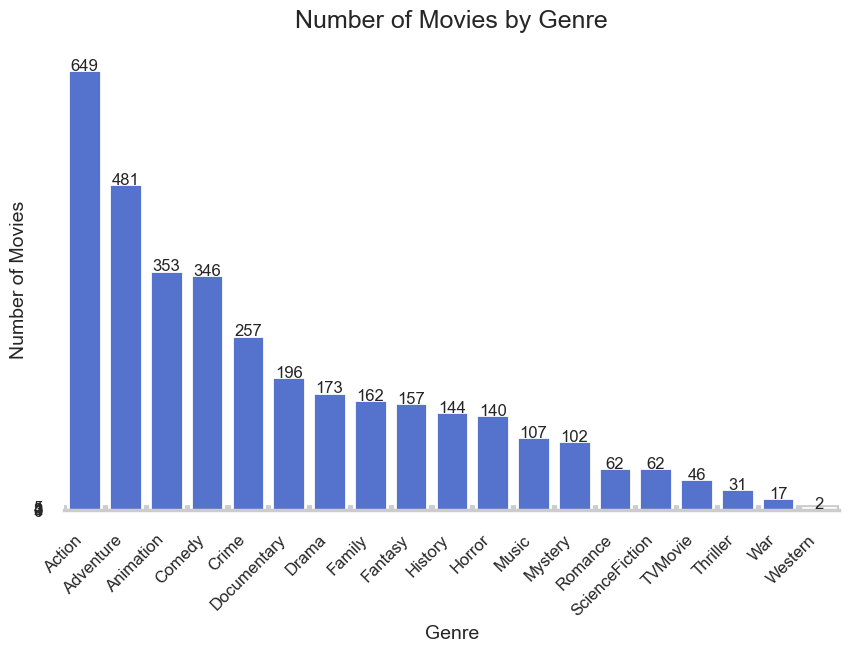

In [40]:
#plotting number of movies in each genre
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=my_genres_df, x='id', y='count', color='royalblue')

# Set plot title and labels
ax.set_title('Number of Movies by Genre', fontsize=18, pad=15)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)

# Set ticks and tick labels
ax.set_xticklabels(list(genre.keys()), rotation=45, ha='right', fontsize=12)
ax.set_yticks(range(0, 6))
ax.set_yticklabels(range(0, 6), fontsize=12)

# Remove spines
sns.despine(left=True)

# Add annotations
for i, val in enumerate(my_genres_df['count']):
    ax.text(i, val + 0.2, str(val), ha='center', fontsize=12)

plt.show()


Here I have a visualization of what kind of genres are released the most and those are genres people are interested in and would work the best for my client to produce. I could see that for  the company it would be best to produce Action, Adventure, some comedy or animation to make it successful. 

# Conclusions

After doing this data analysis I came out with some very interesting facts about movies. I found out what the average budget, duration,language,genre should be. What are the top 5 popular movies, what made them successful. I analyze the  top 3 most profitable movies and year in this dataset. All this information helped me to make recommendations to my client what criteria should Microsoft follow to make a successful movie.
  If follow all the recommendations, the average worldwide gross should be  around 91 million dollars and domestic profit around 41 million dollars.


# Limitations

I wish I had some more information about actors so I could decide who should be in the movie. Because as we know actors are a very important criteria of the movie.

# Recommendations

To make a successful movie the average budget must be around  31 million dollars.
Average duration of the movie must be around 104 minutes
The language has to be English
Genre must be : Action, Adventure, Comedy ,Drama,Family,Fiction or Triller.

# Next Steps

My next step in the development of this topic would be finding more information about directors and writers.